In [524]:
#Assignment 3

#importing neccesary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#reads the csv dataset file
loanData = pd.read_csv('Downloads/Assignment3/data.csv')

In [525]:
# to understand the data
# it shows us that we have 13 columns (12 for input and 1 for output)

loanData

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


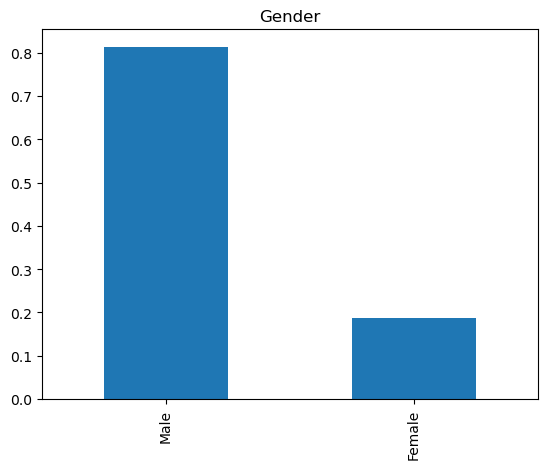

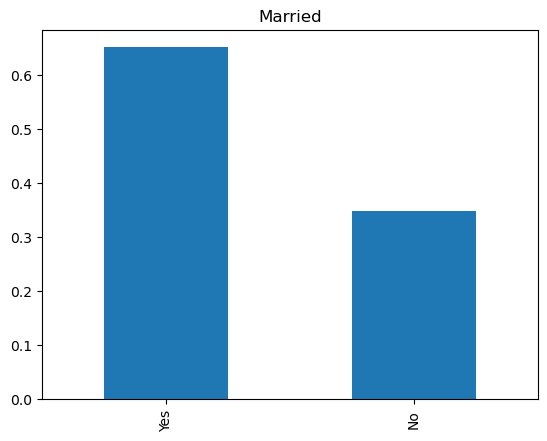

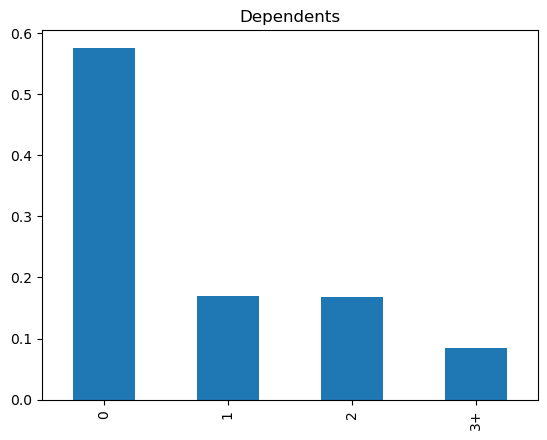

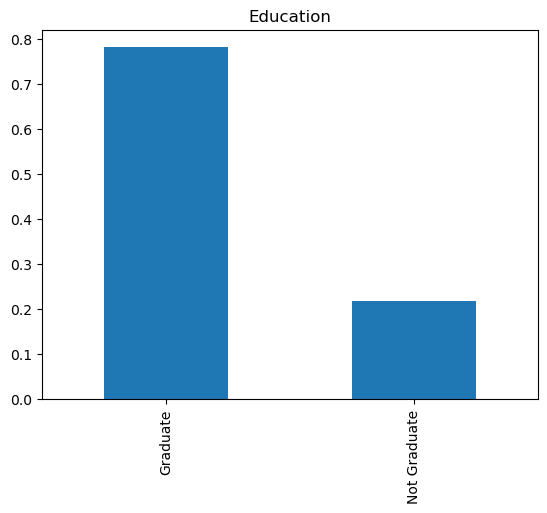

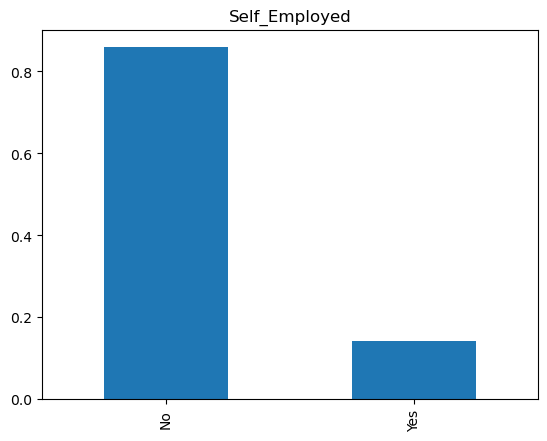

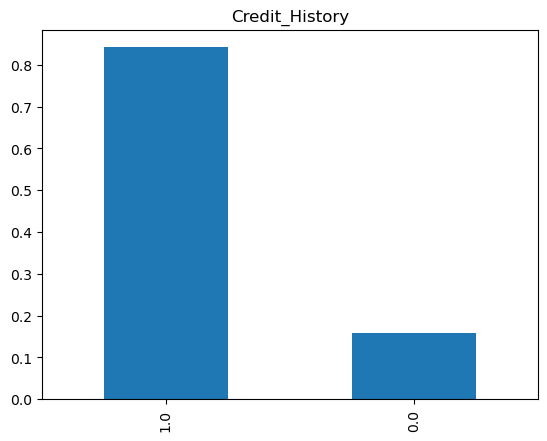

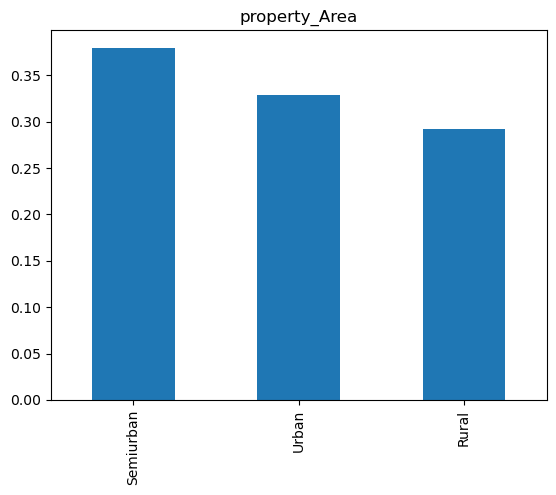

In [526]:
#visualizing the data. Using graphs to visualize the categorical values

loanData['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
loanData['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
loanData['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
loanData['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
loanData['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
loanData['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()
loanData['property_Area'].value_counts(normalize=True).plot.bar(title='property_Area')
plt.show()



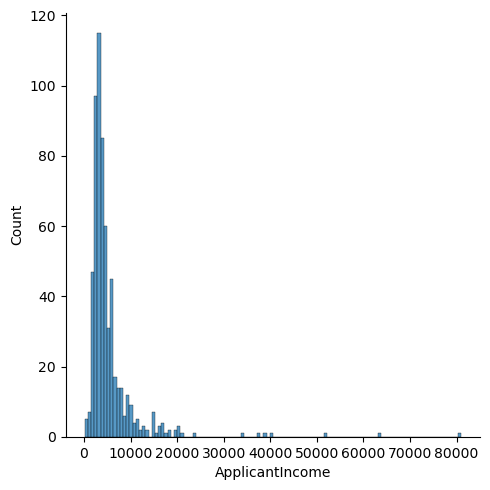

In [527]:
# graphs to show the visualization of the numerical values of the applicant income

import seaborn as sns

sns.displot(loanData['ApplicantIncome'])
plt.show()

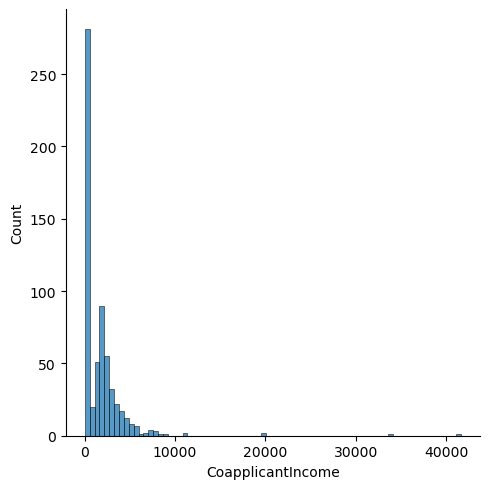

In [528]:
# graphs to show the visualization of the numerical values of Coapplicant Income
sns.displot(loanData['CoapplicantIncome'])
plt.show()

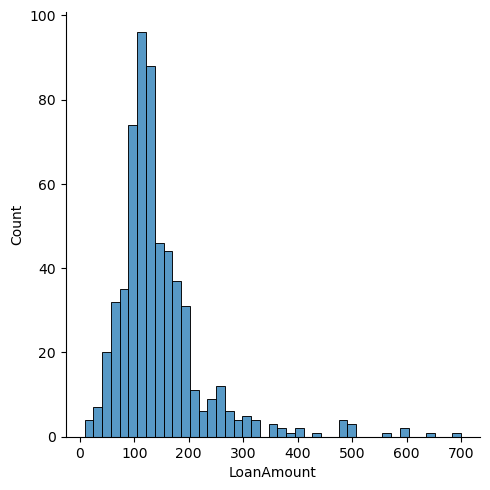

In [529]:
# graphs to show the visualization of the numerical values of the Loan Amount
sns.displot(loanData['LoanAmount'])
plt.show()

In [530]:
#Filling in the missing values

# this code fills in the missing values of the applicant income
loanData[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = loanData[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].fillna(loanData[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].median())

# the code below fills in the missing values that have the most common (categorical columns)
loanData['Gender'].fillna(loanData['Gender'].mode()[0], inplace = True)
loanData['Married'].fillna(loanData['Married'].mode()[0], inplace = True)
loanData['Dependents'].fillna(loanData['Dependents'].mode()[0], inplace = True)
loanData['Education'].fillna(loanData['Education'].mode()[0], inplace = True)
loanData['Self_Employed'].fillna(loanData['Self_Employed'].mode()[0], inplace = True)
loanData['Loan_Amount_Term'].fillna(loanData['Loan_Amount_Term'].mode()[0], inplace = True)
loanData['Credit_History'].fillna(loanData['Credit_History'].mode()[0], inplace = True)

In [531]:
loanData

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,3806.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [532]:
#imported more necessary libraries
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# converting Categorical values into Numerical

#this makes Gender into binary value
gender = pd.get_dummies(loanData['Gender'])
loanData = pd.concat((loanData, gender), axis = 1)
loanData = loanData.drop(['Female'], axis = 1)
loanData = loanData.drop(['Gender'], axis = 1)
loanData = loanData.rename(columns = {'Male': 'Gender'})

# this makes the Loan Status to binary
loanStatus = pd.get_dummies(loanData['Loan_Status'])
loanData = pd.concat((loanData, loanStatus), axis = 1)
loanData = loanData.drop(['N'], axis = 1)
loanData = loanData.drop(['Loan_Status'], axis = 1)
loanData = loanData.rename(columns = {'Y': 'Loan_Status'})

# this code makes the married values into binary
married = pd.get_dummies(loanData['Married'])
loanData = pd.concat((loanData, married), axis = 1)
loanData = loanData.drop(['No'], axis = 1)
loanData = loanData.drop(['Married'], axis = 1)
loanData = loanData.rename(columns = {'Yes': 'Married'})

# this code makes the education values into binary
education = pd.get_dummies(loanData['Education'])
loanData = pd.concat((loanData, education), axis = 1)
loanData = loanData.drop(['Not Graduate'], axis = 1)
loanData = loanData.drop(['Education'], axis = 1)
loanData = loanData.rename(columns = {'Yes': 'Education'})

# this makes the self employed values into binary
selfEmployed = pd.get_dummies(loanData['Self_Employed'])
loanData = pd.concat((loanData, selfEmployed), axis = 1)
loanData = loanData.drop(['No'], axis = 1)
loanData = loanData.drop(['Self_Employed'], axis = 1)
loanData = loanData.rename(columns = {'Yes': 'Self_Employed'})

# using One Hot Encoder for the 'property area' because it has "Urban, Rural, Semiurban"
# this creates a binary vector for each category in the feature, where the vector 
# has a value of 1 in the position corresponding to the category and 0 in all other positions.
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_loanData = pd.DataFrame(encoder.fit_transform(loanData[['property_Area']]).toarray())
loanData = loanData.join(encoder_loanData)
loanData.rename(columns = {0:'Rural', 1:'Semiurban', 2:'Urban'}, inplace = True)

# "dependents" the Label encoder is used to preprocess categorical data
labelEncoder = LabelEncoder()
loanData['Dependents'] = labelEncoder.fit_transform(loanData.Dependents)

In [533]:
#fixing dataframe, to improve the readability of the data by arranging the columns.
genderColumn = loanData.pop('Gender')
loanData.insert(loc = 1, column = 'Gender', value = genderColumn)
marriedColumn = loanData.pop('Married')
loanData.insert(loc = 2, column = 'Married', value = marriedColumn)
educationColumn = loanData.pop('Graduate')
loanData.insert(loc = 3, column = 'Education', value = educationColumn)
selfEmpColumn = loanData.pop('Self_Employed')
loanData.insert(loc = 4, column = 'Self_Employed', value = selfEmpColumn)
loanStatusColumn = loanData.pop('Loan_Status')
loanData.insert(loc = 5, column = 'Loan_Status', value = loanStatusColumn)

In [534]:
loanData

,Loan_ID,Gender,Married,Education,Self_Employed,Loan_Status,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Rural,Semiurban,Urban
0,LP001002,1,0,1,0,1,0,5849.0,0.0,128.0,360.0,1.0,Urban,0.0,0.0,1.0
1,LP001003,1,1,1,0,0,1,3806.0,1508.0,128.0,360.0,1.0,Rural,1.0,0.0,0.0
2,LP001005,1,1,1,1,1,0,3000.0,0.0,66.0,360.0,1.0,Urban,0.0,0.0,1.0
3,LP001006,1,1,0,0,1,0,2583.0,2358.0,120.0,360.0,1.0,Urban,0.0,0.0,1.0
4,LP001008,1,0,1,0,1,0,6000.0,0.0,141.0,360.0,1.0,Urban,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,1,0,1,0,2900.0,0.0,71.0,360.0,1.0,Rural,1.0,0.0,0.0
610,LP002979,1,1,1,0,1,3,4106.0,0.0,40.0,180.0,1.0,Rural,1.0,0.0,0.0
611,LP002983,1,1,1,0,1,1,8072.0,240.0,253.0,360.0,1.0,Urban,0.0,0.0,1.0
612,LP002984,1,1,1,0,1,2,7583.0,0.0,187.0,360.0,1.0,Urban,0.0,0.0,1.0


Text(0.5, 1.0, 'Heatmap Correlation')

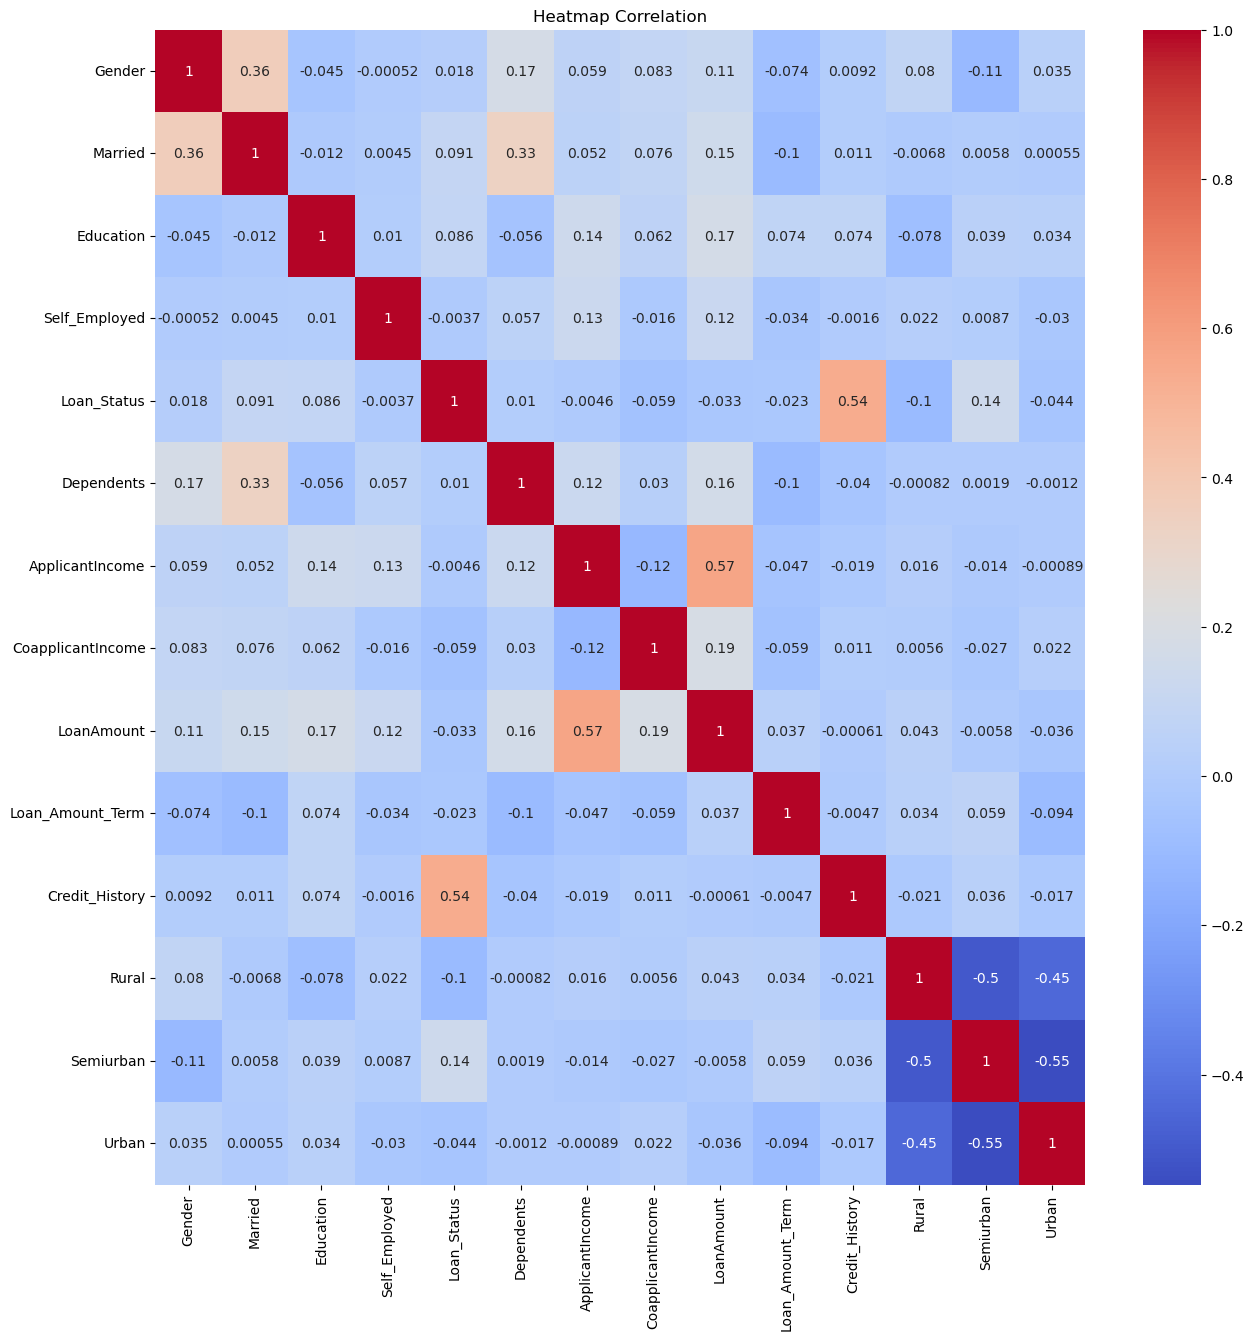

In [535]:
#Feature Correlation HeatMap

correlation = loanData.corr()
plt.figure(figsize = (15,15))
heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm')
heatmap.set_title('Heatmap Correlation')

In [537]:
# Create a new feature 'Total Income'
loanData['Total Income'] = loanData['ApplicantIncome'] + loanData['CoapplicantIncome']

# Drop unnecessary columns
loanData.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'Rural', 'Urban', 'Semiurban', 'property_Area', 'Self_Employed', 'Dependents'], axis=1, inplace=True)

# Check the final dataset
loanData

,Gender,Married,Education,Loan_Status,LoanAmount,Loan_Amount_Term,Credit_History,Total Income
0,1,0,1,1,128.0,360.0,1.0,5849.0
1,1,1,1,0,128.0,360.0,1.0,5314.0
2,1,1,1,1,66.0,360.0,1.0,3000.0
3,1,1,0,1,120.0,360.0,1.0,4941.0
4,1,0,1,1,141.0,360.0,1.0,6000.0
...,...,...,...,...,...,...,...,...
609,0,0,1,1,71.0,360.0,1.0,2900.0
610,1,1,1,1,40.0,180.0,1.0,4106.0
611,1,1,1,1,253.0,360.0,1.0,8312.0
612,1,1,1,1,187.0,360.0,1.0,7583.0


In [538]:
# Separate the target variable from the features
X = loanData.drop('Loan_Status', axis=1)
y = loanData['Loan_Status']

# shows the data of x
X

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Total Income
0,1,0,1,128.0,360.0,1.0,5849.0
1,1,1,1,128.0,360.0,1.0,5314.0
2,1,1,1,66.0,360.0,1.0,3000.0
3,1,1,0,120.0,360.0,1.0,4941.0
4,1,0,1,141.0,360.0,1.0,6000.0
...,...,...,...,...,...,...,...
609,0,0,1,71.0,360.0,1.0,2900.0
610,1,1,1,40.0,180.0,1.0,4106.0
611,1,1,1,253.0,360.0,1.0,8312.0
612,1,1,1,187.0,360.0,1.0,7583.0


In [539]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [540]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [541]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_predTrainData = model.predict(X_train)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7886178861788617


[[18 25]
 [ 1 79]]


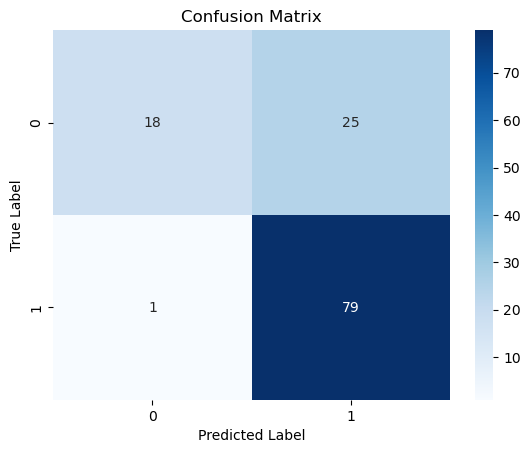

In [550]:
#confusion matrix for the testing data
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [543]:
from sklearn.metrics import precision_score, f1_score, recall_score

#measures the accuracy of algorithm with the training data and testing
accuracyTrain = accuracy_score(y_train, y_predTrainData)
accuracyTest = accuracy_score(y_test, y_pred)

print("accuracy on training data:", accuracyTrain)
print("accuracy on testing data:", accuracyTest)


accuracy on training data: 0.8105906313645621
accuracy on testing data: 0.7886178861788617


In [544]:
print("Precision Score:", precision_score(y_test, y_pred))

Precision Score: 0.7596153846153846


In [549]:
print("Recall:", recall_score(y_test, y_pred))

Recall: 0.9875


In [545]:
print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 0.8586956521739131


In [552]:
from sklearn.metrics import roc_auc_score
y_scores = model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_scores)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.777906976744186
